# Secondary Mushroom
https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

## Информация о переменных:
(n: номинальная, m: метрическая; номинальные значения в виде множеств значений)

1. cap-diameter (m): число с плавающей запятой в см
2. cap-shape (n): колокольчик = b, конусовидный = c, выпуклый = x, плоский = f, вогнутый = s, шаровидный = p, другие = o
3. cap-surface (n): волокнистый = i, бороздчатый = g, чешуйчатый = y, гладкий = s, блестящий = h, кожистый = l, шелковистый = k, липкий = t, морщинистый = w, мясистый = e
4. cap-color (n): коричневый = n, светло-коричневый = b, серый = g, зеленый = r, розовый = p, фиолетовый = u, красный = e, белый = w, желтый = y, синий = l, оранжевый = o, черный = k
5. does-bruise-bleed (n): синяки-или-кровотечения = t, нет = f
6. gill-attachment (n): приросший = a, прикрепленный = x, нисходящий = d, свободный = e, изгибистый = s, поры = p, нет = f, неизвестно = ?
7. gill-spacing (n): близко = c, далеко = d, нет = f
8. gill-color (n): см. cap-color + нет = f
9. stem-height (m): число с плавающей запятой в см
10. stem-width (m): число с плавающей запятой в мм
11. stem-root (n): луковичный = b, утолщенный = s, клубневидный = c, чашечный = u, равный = e, ризоморфные = z, корневой = r
12. stem-surface (n): см. cap-surface + нет = f
13. stem-color (n): см. cap-color + нет = f
14. veil-type (n): частичный = p, универсальный = u
15. veil-color (n): см. cap-color + нет = f
16. has-ring (n): кольцо = t, нет = f
17. ring-type (n): паутинный = c, исчезающий = e, расширяющийся = r, бороздчатый = g, крупный = l, подвесной = p, оберточный = s, зональный = z, чешуйчатый = y, подвижный = m, нет = f, неизвестно = ?
18. spore-print-color (n): см. cap color
19. habitat (n): травы = g, листья = l, луга = m, пути = p, вересковые = h, городские = u, свалки =  w, леса = d
20. season (n): весна = s, лето = u, осень = a, зима = w



In [ ]:
# Подключаем необходимые библиотеки.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [ ]:
# Импортируем google диск

from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Считываем данные из файла secondary_data.csv

primary_data = pd.read_csv('/content/drive/My Drive/DataSet/secondary_data.csv', sep=';')

In [ ]:
primary_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
# Выводим информацию о датафрейме

primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

Стоит сразу обратить внимание, что пропущенные значения есть в столбцах:

 3   cap-surface            
 6   gill-attachment       
 7   gill-spacing           
 11  stem-root              
 12  stem-surface           
 14  veil-type            
 15  veil-color              
 17  ring-type             
 18  spore-print-color     

  Для дальнейшей работы необходимо будет заменить пропущенные значения. Моё мнение такого: в данном наборе данных нецелесообразно заменять значения на наиболее популярное, так как легко наделать ошибок и превратить набор данных в "белиберду". Поэтому, когда будем заменять категориальные данные на числовые, введём ещё одну категорию - неизвестно.

####Справка "DataFrame.describe()"

*count:* Количество ненулевых (непустых) значений в каждом столбце.

*mean:* Среднее арифметическое значений в столбце.

*std:* Стандартное отклонение значений в столбце, показывающее, насколько данные разбросаны.

*min:* Минимальное значение в столбце.

*25%, 50% (медиана), 75%:* Квартильные значения, которые делят данные на части (25-й процентиль, медиана (50-й процентиль), и 75-й процентиль).
max: Максимальное значение в столбце.

In [ ]:
primary_data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


Как мы видим, в данным момент 3 числовых и 18 категориальных столбца. Категориальные данные неудобны в машинном обучение, так как большинство алгоритмов работают с числами и не могут напрямую обрабатывать текстоввые и категориальные значения. Заменим категориальные значения в столбца на числовые.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Словарь для хранения LabelEncoders
label_encoders = {}
n = 1

# Замена NaN на 0 и других значений на 1+ с использованием LabelEncoder
for column in primary_data.columns:
    if primary_data[column].dtype == 'object':  # Проверяем, является ли столбец категориальным (строковым)
        # Замена NaN на специальное значение, например, "NaN" для корректной работы LabelEncoder
        has_nan = primary_data[column].isnull().any()
        primary_data[column] = primary_data[column].fillna('NaN')

        # Инициализируем LabelEncoder и применяем его к столбцу
        le = LabelEncoder()
        primary_data[column] = le.fit_transform(primary_data[column])

        # Если в столбце не было NaN изначально, смещаем все значения на 1
        if not has_nan:
            primary_data[column] += 1

        # Сохраняем LabelEncoder для обратного преобразования (если потребуется)
        label_encoders[column] = le

        # Вывод информации о заменах
        print(f"{n}. Заменены значения в столбце '{column}':")
        n += 1
        unique_classes = le.classes_
        for idx, original_value in enumerate(unique_classes):
            adjusted_idx = idx + 1 if not has_nan else idx
            print(f"  '{original_value}' на {adjusted_idx}")

1. Заменены значения в столбце 'class':
  'e' на 1
  'p' на 2
2. Заменены значения в столбце 'cap-shape':
  'b' на 1
  'c' на 2
  'f' на 3
  'o' на 4
  'p' на 5
  's' на 6
  'x' на 7
3. Заменены значения в столбце 'cap-surface':
  'NaN' на 0
  'd' на 1
  'e' на 2
  'g' на 3
  'h' на 4
  'i' на 5
  'k' на 6
  'l' на 7
  's' на 8
  't' на 9
  'w' на 10
  'y' на 11
4. Заменены значения в столбце 'cap-color':
  'b' на 1
  'e' на 2
  'g' на 3
  'k' на 4
  'l' на 5
  'n' на 6
  'o' на 7
  'p' на 8
  'r' на 9
  'u' на 10
  'w' на 11
  'y' на 12
5. Заменены значения в столбце 'does-bruise-or-bleed':
  'f' на 1
  't' на 2
6. Заменены значения в столбце 'gill-attachment':
  'NaN' на 0
  'a' на 1
  'd' на 2
  'e' на 3
  'f' на 4
  'p' на 5
  's' на 6
  'x' на 7
7. Заменены значения в столбце 'gill-spacing':
  'NaN' на 0
  'c' на 1
  'd' на 2
  'f' на 3
8. Заменены значения в столбце 'gill-color':
  'b' на 1
  'e' на 2
  'f' на 3
  'g' на 4
  'k' на 5
  'n' на 6
  'o' на 7
  'p' на 8
  'r' на 9
  

In [ ]:
primary_data.describe()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,...,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,1.554913,6.733854,5.041641,4.984100,7.144541,1.173410,2.948141,0.832370,8.338502,6.581538,...,0.479769,2.060964,9.429072,0.052023,0.563396,1.248555,2.369074,0.380439,1.623721,2.053300
std,0.496979,5.264845,2.138630,3.966123,3.171077,0.378605,2.383064,0.860638,3.186426,3.370017,...,1.301808,2.934895,3.218516,0.222075,1.558891,0.432179,1.544033,1.278864,1.265880,1.100575
min,1.000000,0.380000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,3.480000,3.000000,1.000000,6.000000,1.000000,1.000000,0.000000,6.000000,4.640000,...,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000
50%,2.000000,5.860000,6.000000,4.000000,6.000000,1.000000,2.000000,1.000000,8.000000,5.950000,...,0.000000,0.000000,12.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000
75%,2.000000,8.540000,7.000000,9.000000,11.000000,1.000000,5.000000,1.000000,11.000000,7.740000,...,0.000000,4.000000,12.000000,0.000000,0.000000,1.000000,2.000000,0.000000,2.000000,3.000000
max,2.000000,62.340000,7.000000,11.000000,12.000000,2.000000,7.000000,3.000000,12.000000,33.920000,...,5.000000,8.000000,13.000000,1.000000,6.000000,2.000000,8.000000,7.000000,8.000000,4.000000


In [ ]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int64  
 3   cap-surface           61069 non-null  int64  
 4   cap-color             61069 non-null  int64  
 5   does-bruise-or-bleed  61069 non-null  int64  
 6   gill-attachment       61069 non-null  int64  
 7   gill-spacing          61069 non-null  int64  
 8   gill-color            61069 non-null  int64  
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  int64  
 12  stem-surface          61069 non-null  int64  
 13  stem-color            61069 non-null  int64  
 14  veil-type             61069 non-null  int64  
 15  veil-color         

Теперь мы видим, что все значения непустые и числовые.

In [ ]:
primary_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,2,15.26,7,3,7,1,3,0,11,16.95,...,5,8,12,1,5,2,3,0,1,4
1,2,16.60,7,3,7,1,3,0,11,17.99,...,5,8,12,1,5,2,3,0,1,3
2,2,14.07,7,3,7,1,3,0,11,17.80,...,5,8,12,1,5,2,3,0,1,4
3,2,14.17,3,4,2,1,3,0,11,15.77,...,5,8,12,1,5,2,6,0,1,4
4,2,14.64,7,4,7,1,3,0,11,16.53,...,5,8,12,1,5,2,6,0,1,4


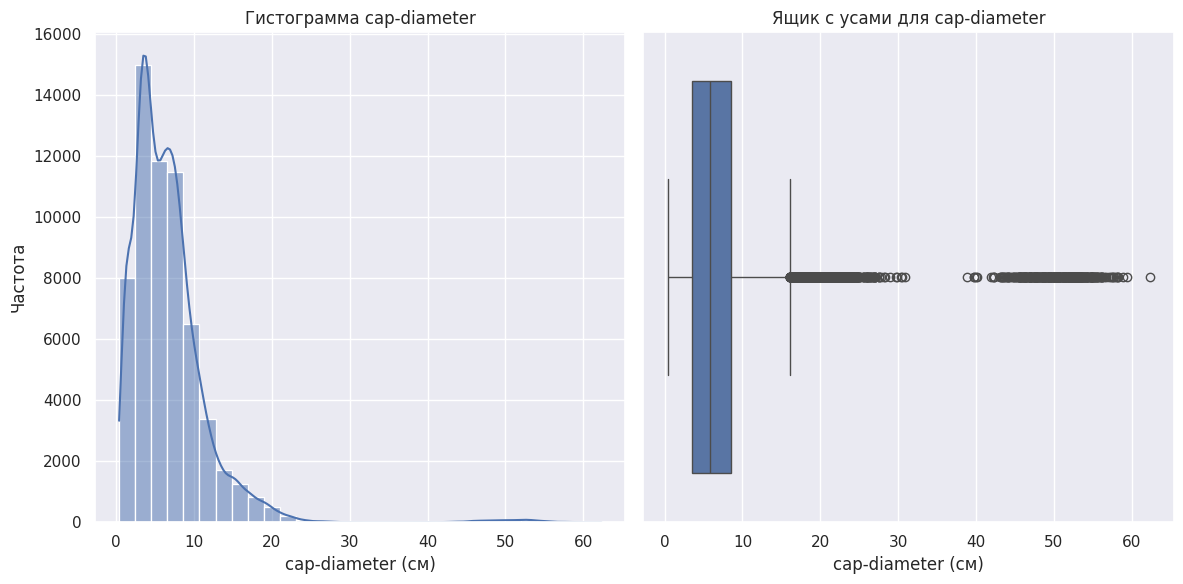

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Первый график - гистограмма
plt.subplot(1, 2, 1)
sns.histplot(primary_data['cap-diameter'], bins=30, kde=True)
plt.title('Гистограмма cap-diameter')
plt.xlabel('cap-diameter (см)')
plt.ylabel('Частота')

# Второй график - ящик с усами
plt.subplot(1, 2, 2)
sns.boxplot(x=primary_data['cap-diameter'])
plt.title('Ящик с усами для cap-diameter')
plt.xlabel('cap-diameter (см)')

plt.tight_layout()
plt.show()


1. Гистограмма для cap-diameter:

Ось X: Представляет значения диаметра шляпки гриба (в сантиметрах).

Ось Y: Показывает частоту (количество наблюдений) для каждого диапазона значений диаметра.


График имеет явный правосторонний скошенный вид, что говорит о том, что большинство грибов имеют маленький или средний диаметр шляпки, тогда как с увеличением диаметра частота уменьшается.
Это может указывать на то, что меньшие грибы более распространены.
2. Ящик с усами для cap-diameter:

Центральная линия (медиа): Отображает медиану диаметра шляпки (50-й процентиль), которая делит данные пополам.

Коробка: Измеряет интерквартильный размах (IQR) — разницу между первым (25-й процентиль) и третьим (75-й процентиль) квартилями. Коробка показывает, где находится 50% данных.

Усы: Простираются до минимального и максимального значения, не считая выбросы.

Выбросы: Точки за пределами усов указывают на аномальные значения (грибы с очень большим диаметром).
3. Общие выводы:

Оба графика показывают, что большинство данных сосредоточено в нижнем диапазоне, а присутствие выбросов в ящике с усами может указывать на редкие случаи с очень большими диаметрами.

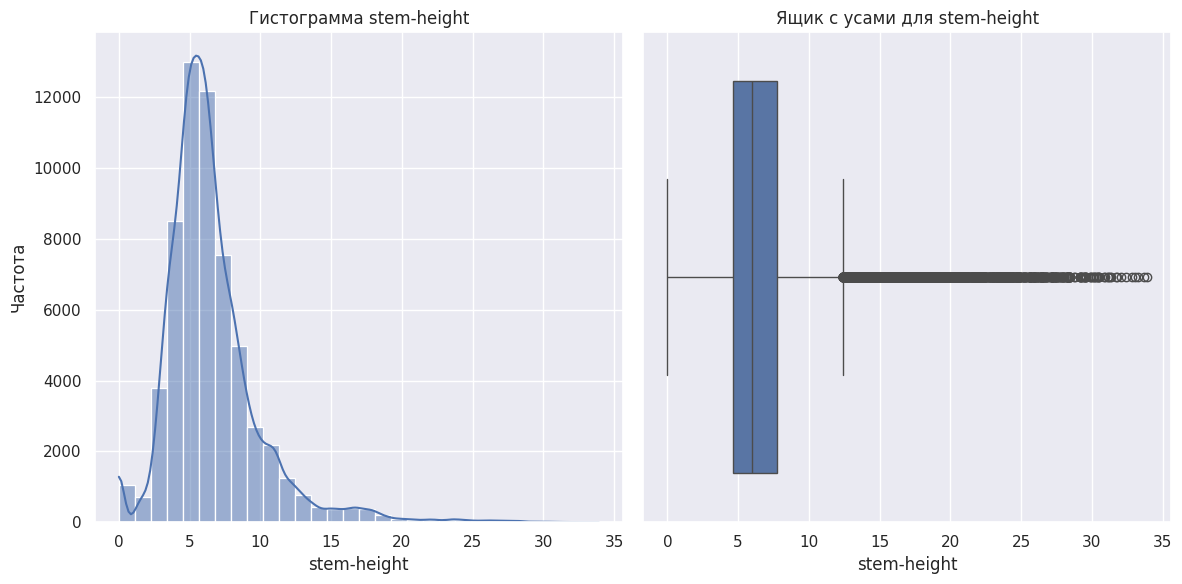

In [ ]:
plt.figure(figsize=(12, 6))

# Первый график - гистограмма
plt.subplot(1, 2, 1)
sns.histplot(primary_data['stem-height'], bins=30, kde=True)
plt.title('Гистограмма stem-height')
plt.xlabel('stem-height')
plt.ylabel('Частота')

# Второй график - ящик с усами
plt.subplot(1, 2, 2)
sns.boxplot(x=primary_data['stem-height'])
plt.title('Ящик с усами для stem-height')
plt.xlabel('stem-height')

plt.tight_layout()
plt.show()

1. Гистограмма для stem-height:

Ось X: Представляет значения высоты ножки гриба (в сантиметрах).

Ось Y: Отображает частоту наблюдений для каждого диапазона высот.


Гистограмма показывает, что большинство грибов имеют небольшую высоту ножки (от 0 до 10 см), с резким уменьшением частоты при увеличении высоты.
Распределение кажется правосторонне скошенным, что указывает на большую популярность грибов с меньшей высотой.
2. Ящик с усами для stem-height:

Центральная линия (медиа): Указывает на медиану высоты ножки, которая разделяет набор данных пополам.

Коробка: Представляет интерквартильный размах (IQR), показывая разброс средних 50% высот ножек.


Усы: Пределы усов отображают диапазон между минимальной и максимальной высотой, исключая выбросы.
Выбросы: На графике видно много выбросов на правой стороне, что может означать наличие грибов с аномально высокой ножкой.

3. Общие выводы:
Высота ножки грибов сосредоточена в нижнем диапазоне значений, что может указывать на преобладание низкорослых видов.

plt.figure(figsize=(12, 6))

# Первый график - гистограмма
plt.subplot(1, 2, 1)
sns.histplot(primary_data['stem-height'], bins=30, kde=True)
plt.title('Гистограмма stem-height')
plt.xlabel('stem-height')
plt.ylabel('Частота')

# Второй график - ящик с усами
plt.subplot(1, 2, 2)
sns.boxplot(x=primary_data['stem-height'])
plt.title('Ящик с усами для stem-height')
plt.xlabel('stem-height')

plt.tight_layout()
plt.show()

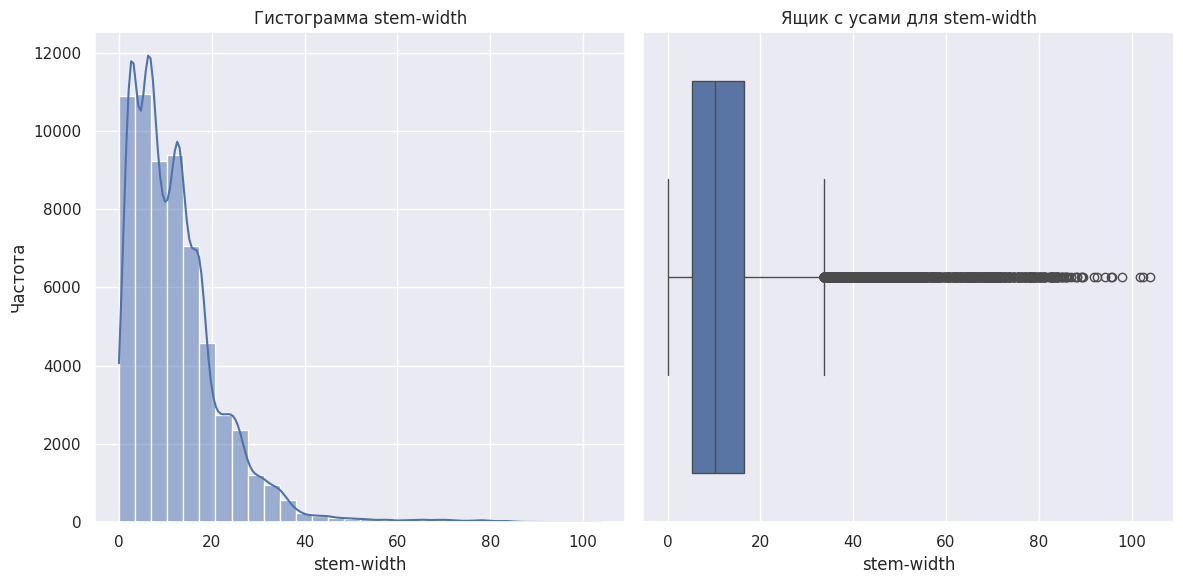

In [ ]:
plt.figure(figsize=(12, 6))

# Первый график - гистограмма
plt.subplot(1, 2, 1)
sns.histplot(primary_data['stem-width'], bins=30, kde=True)
plt.title('Гистограмма stem-width')
plt.xlabel('stem-width')
plt.ylabel('Частота')

# Второй график - ящик с усами
plt.subplot(1, 2, 2)
sns.boxplot(x=primary_data['stem-width'])
plt.title('Ящик с усами для stem-width')
plt.xlabel('stem-width')

plt.tight_layout()
plt.show()

1. Гистограмма для stem-width:

Ось X: Представляет значения ширины ножки гриба (в миллиметрах).

Ось Y: Отображает частоту наблюдений для каждого диапазона ширин.
Форма распределения:

Гистограмма показывает, что большинство грибов имеют небольшую ширину ножки, особенно в диапазоне от 0 до 30 мм, с резким уменьшением частоты при увеличении ширины.

Распределение имеет правостороннее скошение, что указывает на преобладание узких грибов и на уменьшение числа случаев с более широкой ножкой.
2. Ящик с усами для stem-width:

Центральная линия (медиа): Указывает на медиану ширины ножки, показывая, что 50% данных находится ниже этого значения.

Коробка: Отображает интерквартильный размах (IQR), что демонстрирует разброс

средних 50% ширин ножек.

Усы: Соответствуют минимальному и максимальному значениям ширины, исключая выбросы.

Выбросы: Видно много выбросов, особенно на правой стороне графика, указывая на наличие грибов с значительно широкой ножкой.
3. Общие выводы:

Ширина ножки грибов преимущественно сосредоточена в нижнем диапазоне, что может указывать на преобладание узколистых видов.
Наличие большого количества выбросов может свидетельствовать о редких случаях с необычно широкой ножкой.

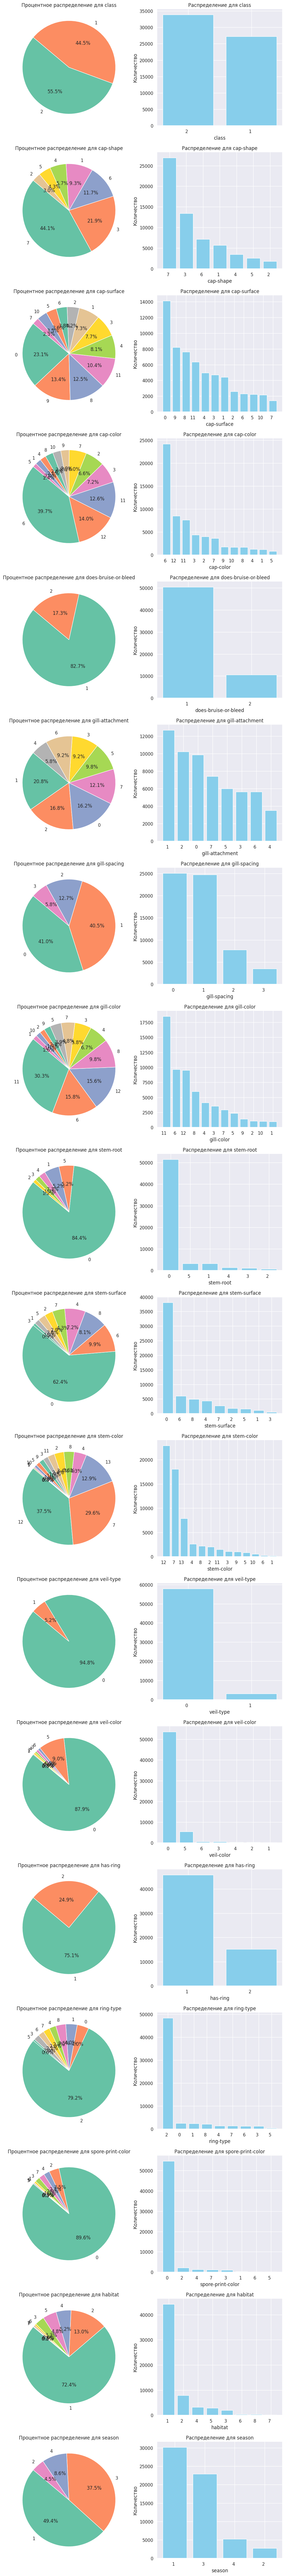

In [ ]:
name = primary_data.columns  # Получаем список столбцов

ncols = 2                                                                                # Количество столбцов в таблице графиков
filtered_columns = [column for column in name if primary_data[column].dtype == 'int64']  # Оставляем только категориальные столбцы
nrows = len(filtered_columns)                                                            # Количество строк в таблице графиков

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))  # Создаём сетку (фигуру и набор графиков)
axes = axes.flatten()                                                               # Преобразуем в одномерный массив для удобства

# Цикл по индексу и названию столбца
for i, column in enumerate(filtered_columns):
    # Круговая диаграмма
    ax_pie = axes[i * 2]                                # Левый график (круговая диаграмма)
    value_counts = primary_data[column].value_counts()  # Подсчитываем количество уникальных значений в текущем столбце
    ax_pie.pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set2', len(value_counts))
    )
    ax_pie.set_title(f'Процентное распределение для {column}')

    # Гистограмма
    ax_bar = axes[i * 2 + 1]             # Правый график (гистограмма)
    bars = ax_bar.bar(
        range(len(value_counts.index)),  # Устанавливаем метки по порядку
        value_counts.values,
        color='skyblue'
    )
    ax_bar.set_xticks(range(len(value_counts.index)))  # Устанавливаем метки только в позиции каждого столбца
    ax_bar.set_xticklabels(value_counts.index, ha='right')  # Устанавливаем подписи и поворачиваем для лучшей читаемости

    ax_bar.set_title(f'Распределение для {column}')  # Заголовок для графика
    ax_bar.set_ylabel('Количество')                  # Метка оси Y
    ax_bar.set_xlabel(column)                        # Метка оси X

plt.tight_layout()
plt.show()


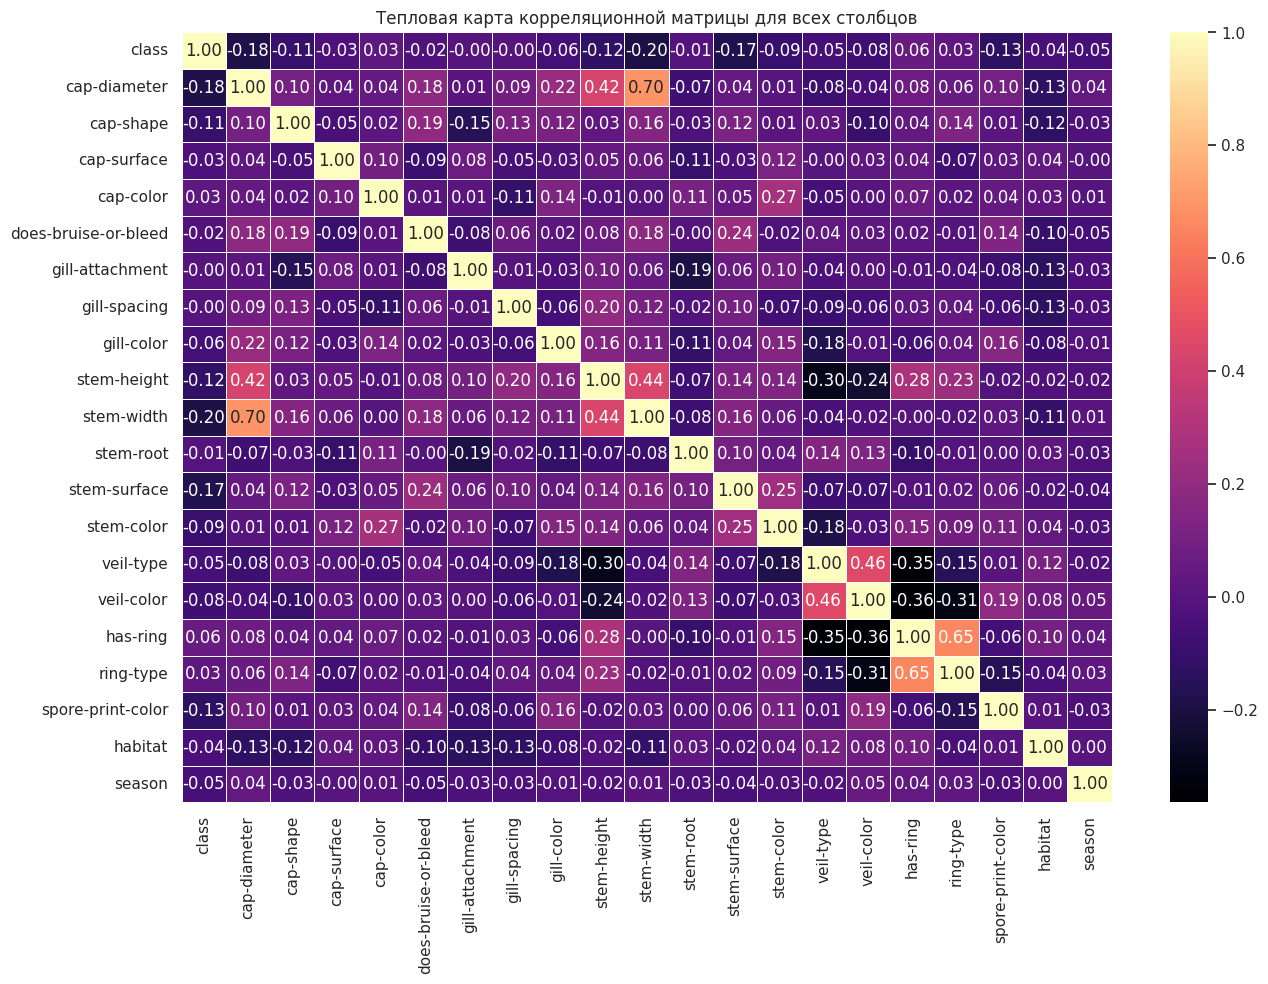

In [ ]:
# Расчет корреляционной матрицы для всех числовых столбцов в датафрейме
corr_matrix = primary_data.corr()

# Построение тепловой карты
plt.figure(figsize=(15, 10))  # Увеличение размера графика для лучшей читаемости
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляционной матрицы для всех столбцов')
plt.show()

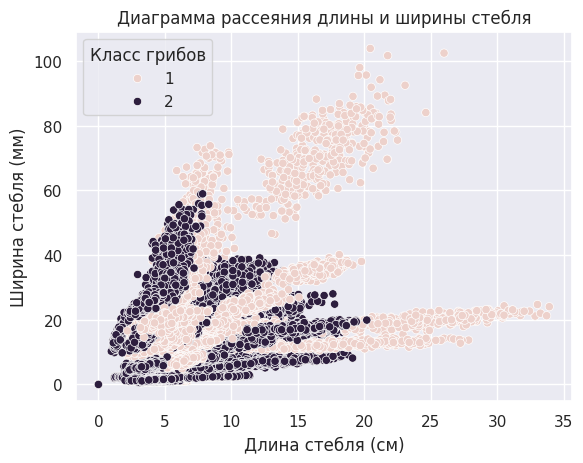

In [ ]:
# Создаем диаграмму рассеяния для длины и ширины стебля
sns.scatterplot(x='stem-height', y='stem-width', hue='class', data=primary_data)
plt.title('Диаграмма рассеяния длины и ширины стебля')
plt.xlabel('Длина стебля (см)')
plt.ylabel('Ширина стебля (мм)')
plt.legend(title='Класс грибов')
plt.show()


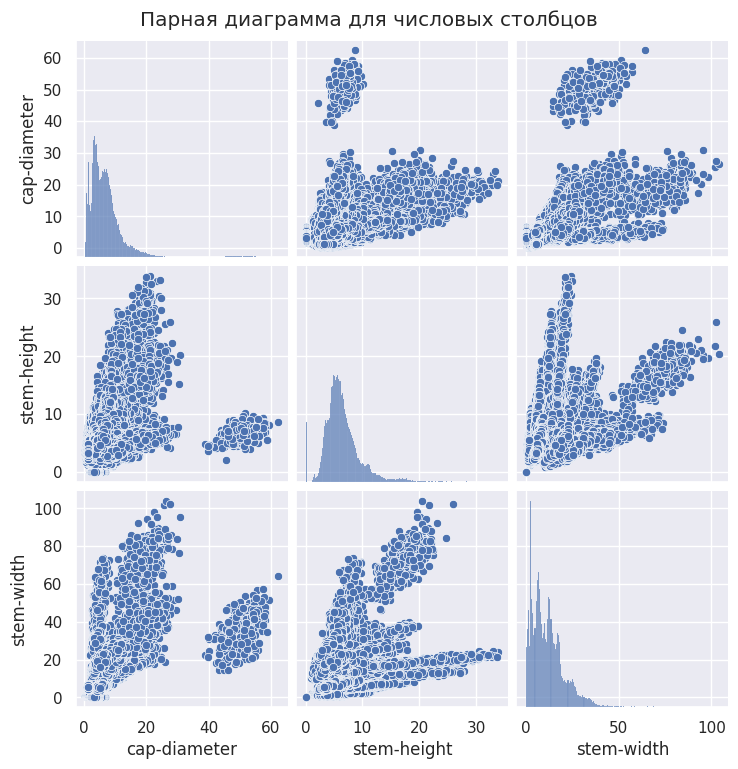

In [ ]:
# Парные графики для числовых признаков - визуализирует возможные зависимости между числовыми признаками.
sns.pairplot(primary_data[numerical_columns])
plt.suptitle('Парная диаграмма для числовых столбцов', y=1.02)
plt.show()

1. Гистограммы по диагонали

Гистограммы на главной диагонали показывают распределение каждой переменной:

2. Сравнения между переменными

* cap-diameter vs. stem-height:

Наблюдается положительная взаимосвязь, где более толстые шляпки соответствуют более высоким стеблям. Однако выше 50  информация становится менее плотной.

  
* cap-diameter vs. stem-width:

Имеется также положительная корреляция. Большие диаметры шляпок сопровождаются более широкими стеблями, но данные также имеют тенденцию расходиться в диапазоне выше 20.


* stem-height vs. stem-width:

Наблюдается слабая корреляция, но указывает на то, что более высокие стебли могут немного отслеживаться с более широкими, хотя в целом разброс значений достаточно велик.